# 说明
本篇博客采用的卷积神经网络模型是Lecun于2011年发表的论文：
[Traffic Sign Recognition with Multi-Scale Convolutional Networks](https://scholar.google.com/scholar_url?url=http://ieeexplore.ieee.org/abstract/document/6033589/&hl=zh-CN&sa=T&oi=gsb&ct=res&cd=0&ei=3rrqWtr1IsSyyASpkrLgDA&scisig=AAGBfm1qTtsdXG41K740eWaSoOr0-BKhoQ)

In [1]:
# Load data
import pickle
training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file,mode='rb') as f:
    train = pickle.load(f)
with open(testing_file,mode='rb') as f:
    test = pickle.load(f)

X_train,y_train = train['features'],train['labels']
X_test,y_test = test['features'],test['labels']

print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


In [2]:
import csv
import numpy as np
n_train = len(X_train)
n_test = len(X_test)

_,IMG_HEIGHT,IMG_WIDTH,IMG_DEPTH = X_train.shape
image_shape = (IMG_HEIGHT,IMG_WIDTH,IMG_DEPTH)

with open('data/signnames.csv','r') as sign_name:
    reader = csv.reader(sign_name)
    sign_names = list(reader)

sign_names = sign_names[1::]
NUM_CLASSES = len(sign_names)
print('Total number of classes:{}'.format(NUM_CLASSES))

n_classes = len(np.unique(y_train))
assert (NUM_CLASSES== n_classes) ,'1 or more class(es) not represented in training set'

n_test = len(y_test)

print('Number of training examples =',n_train)
print('Number of testing examples =',n_test)
print('Image data shape=',image_shape)
print('Number of classes =',n_classes)

Total number of classes:43
Number of training examples = 34799
Number of testing examples = 12630
Image data shape= (32, 32, 3)
Number of classes = 43


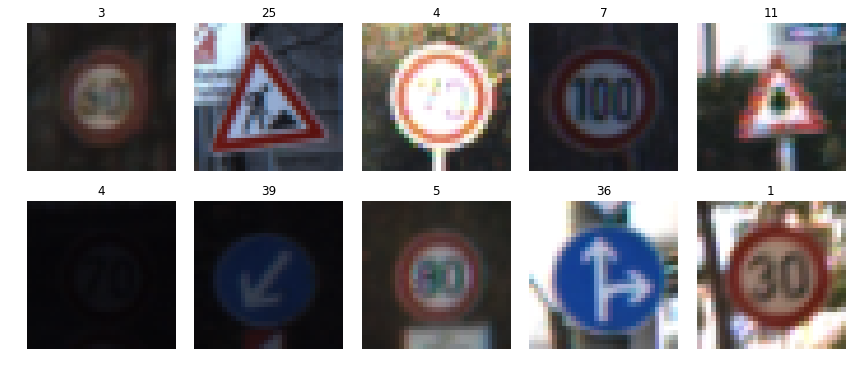

In [3]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

# show image of 10 random data points
fig,axs = plt.subplots(2,5,figsize=(15,6))
fig.subplots_adjust(hspace=.2,wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0,len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

[ 0.          0.97674419  1.95348837  2.93023256  3.90697674  4.88372093
  5.86046512  6.8372093   7.81395349  8.79069767  9.76744186 10.74418605
 11.72093023 12.69767442 13.6744186  14.65116279 15.62790698 16.60465116
 17.58139535 18.55813953 19.53488372 20.51162791 21.48837209 22.46511628
 23.44186047 24.41860465 25.39534884 26.37209302 27.34883721 28.3255814
 29.30232558 30.27906977 31.25581395 32.23255814 33.20930233 34.18604651
 35.1627907  36.13953488 37.11627907 38.09302326 39.06976744 40.04651163
 41.02325581 42.        ]


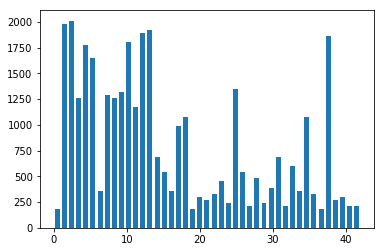

In [4]:
hist,bins = np.histogram(y_train,bins=n_classes)
print(bins)
width = 0.7*(bins[1]-bins[0])
center = (bins[:-1]+bins[1:])/2
plt.bar(center,hist,align='center',width=width)
plt.show()

In [5]:
# Design and Test a model Architecture
X_train_rgb = X_train
X_train_gry = np.sum(X_train/3,axis=3,keepdims=True)

X_test_rgb = X_test
X_test_gry = np.sum(X_test/3,axis=3,keepdims=True)

print('RGB shape:',X_train_rgb.shape)
print('Graysacle shape:',X_train_gry.shape)

RGB shape: (34799, 32, 32, 3)
Graysacle shape: (34799, 32, 32, 1)


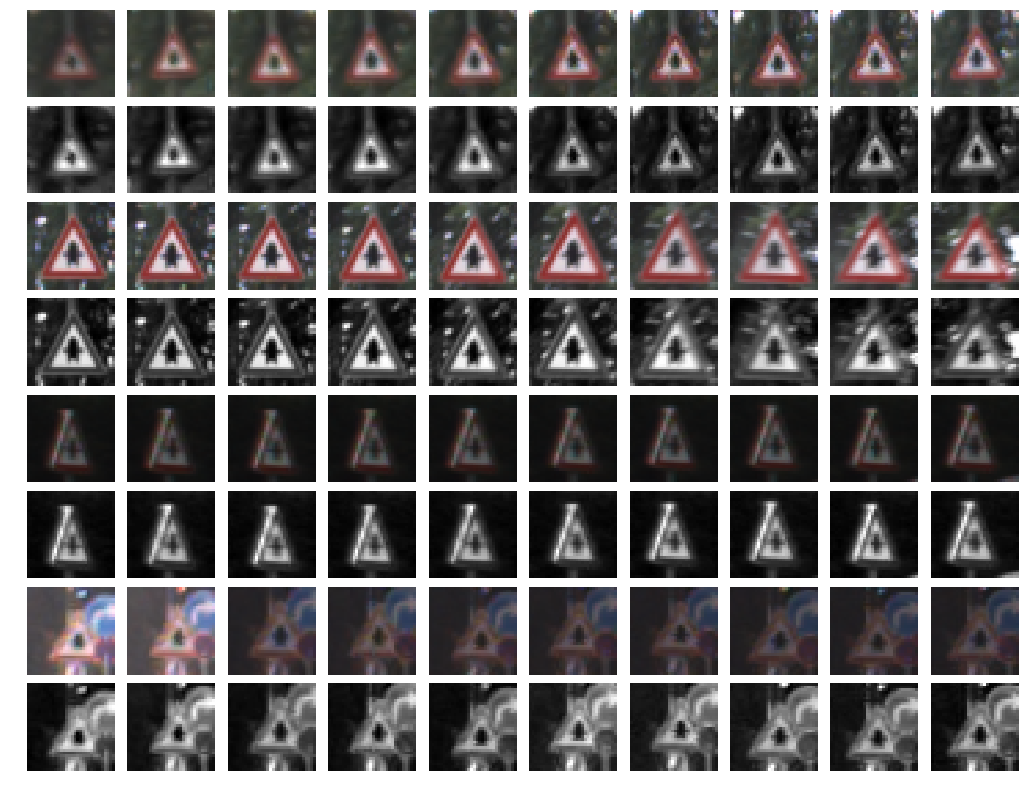

In [6]:
X_train = X_train_gry
X_test = X_test_gry
# Visualize rgb vs grayscale
n_rows = 8
n_cols = 10
offset = 9000
fig,axs = plt.subplots(n_rows,n_cols,figsize=(18,14))
fig.subplots_adjust(hspace=.1,wspace=.001)
axs = axs.ravel()
for j in range(0,n_rows,2):
    for i in range(n_cols):
        index = i + j*n_cols
        image = X_train_rgb[index+offset]
        axs[index].axis('off')
        axs[index].imshow(image)
    for i in range(n_cols):
        index = i + j*n_cols +n_cols
        image = X_train_gry[index + offset-n_cols].squeeze()
        axs[index].axis('off')
        axs[index].imshow(image,cmap='gray')

In [7]:
X_train[0][0][0]

array([25.66666667])

In [8]:
# Normalize the train and test datasets to (-1,1)
X_train_normalized = (X_train -128)/128
X_test_normalized = (X_test - 128)/128


# Preprocess

shape in/out: (32, 32, 1) (32, 32, 1)


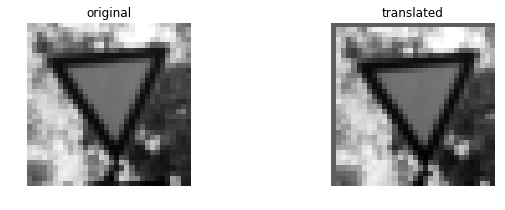

In [9]:
import cv2
def random_translate(img):
    rows,cols,_ = img.shape
    
    #allow translation up to px pixels in x and y directions
    px = 2
    dx,dy = np.random.randint(-px,px,2)
    
    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    return dst

test_img = X_train_normalized[22222]

test_dst = random_translate(test_img)

fig,axs = plt.subplots(1,2,figsize=(10,3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(),cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(),cmap='gray')
axs[1].set_title('translated')

print('shape in/out:',test_img.shape,test_dst.shape)

shape in/out: (32, 32, 1) (32, 32, 1)


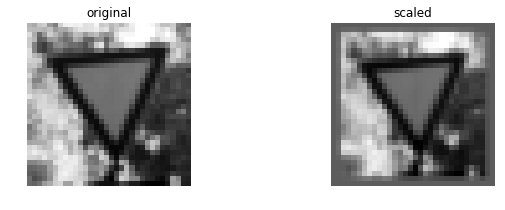

In [10]:
def random_scaling(img):
    rows,cols,_ = img.shape
    
    #transform limits
    px = np.random.randint(-2,2)
    
    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])
    
    #starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img,M,(rows,cols))
    dst = dst[:,:,np.newaxis]
    
    return dst
test_dst = random_scaling(test_img)
fig,axs = plt.subplots(1,2,figsize=(10,3))

#print(test_dst.shape)
#print(test_dst.squeeze().shape)
axs[0].axis('off')
axs[0].imshow(test_img.squeeze(),cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(),cmap='gray')
axs[1].set_title('scaled')

print('shape in/out:',test_img.shape,test_dst.shape)

shape in/out: (32, 32, 1) (32, 32, 1)


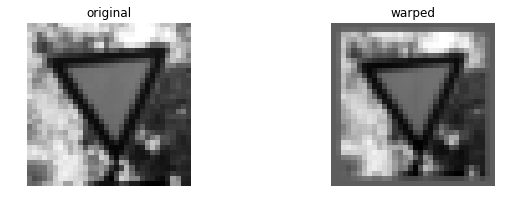

In [11]:
def random_warp(img):
    rows,cols,_ = img.shape
    
    # random scaling cofficients
    rndx = np.random.rand(3) - 0.5
    rndx *=cols*0.06
    rndy = np.random.rand(3) - 0.5
    rndy *=rows*0.06
    
    # 3 starting points for transform,1/4 way from edges
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4
    
    pts1 = np.float32([[y1,x1],
                      [y2,x1],
                      [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndy[0]],
                      [y2+rndy[1],x1+rndx[1]],
                      [y1+rndy[2],x2+rndx[2]]])
    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img,M,(cols,rows))
    #print(dst.shape)
    dst = dst[:,:,np.newaxis]
    return dst
fig,axs = plt.subplots(1,2,figsize=(10,3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(),cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(),cmap='gray')
axs[1].set_title('warped')
print('shape in/out:',test_img.shape,test_dst.shape)

shape in/out: (32, 32, 1) (32, 32, 1)


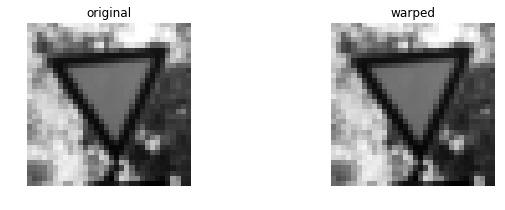

In [12]:
def random_brightness(img):
    shifted = img+1.0
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef,max_coef)
    dst = shifted*coef - 1.0
    return dst

test_dst = random_brightness(test_img)
fig,axs = plt.subplots(1,2,figsize=(10,3))


axs[0].axis('off')
axs[0].imshow(test_img.squeeze(),cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(),cmap='gray')
axs[1].set_title('warped')
print('shape in/out:',test_img.shape,test_dst.shape)

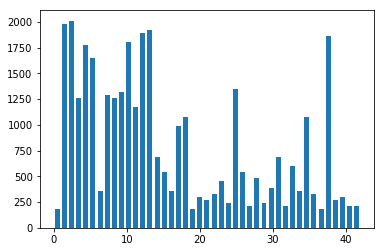

In [13]:
# histogram of label frequency (once again,before data augmentation)
hist,bins = np.histogram(y_train,bins=n_classes)
width = 0.7*(bins[1]-bins[0])
center = (bins[:-1]+bins[1:])/2
plt.bar(center,hist,align='center',width=width)
plt.show()

In [14]:
print(np.bincount(y_train))
print('minimum samples for any label:',min(np.bincount(y_train)))

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
  690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
  480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
  210]
minimum samples for any label: 180


In [15]:
print('X,y shapes:',X_train_normalized.shape,y_train.shape)
# input_indices map to output_indices
input_indices = []
output_indices = []

for class_n in range(n_classes):
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 800:
        for i in range(800-n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train_normalized.shape[0])
            new_img = X_train_normalized[class_indices[0][i%n_samples]]
            new_img = random_translate(random_scaling(random_warp(random_brightness(new_img))))
            X_train_normalized = np.concatenate((X_train_normalized,[new_img]),axis=0)
            y_train = np.concatenate((y_train,[class_n]),axis=0)
print('X,y shapes:',X_train_normalized.shape,y_train.shape)

X,y shapes: (34799, 32, 32, 1) (34799,)
X,y shapes: (46480, 32, 32, 1) (46480,)


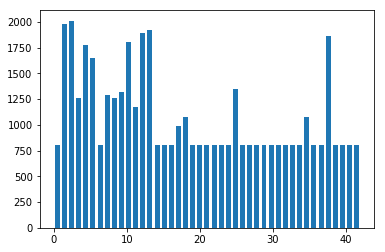

In [16]:
# histogram of label freguency
hist,bins = np.histogram(y_train,bins=n_classes)
width = 0.7*(bins[1]-bins[0])
center = (bins[:-1]+bins[1:])/2
plt.bar(center,hist,align='center',width=width)
plt.show()

In [17]:
# shuffle the training dataset
from sklearn.utils import shuffle

X_train_normalized,y_train = shuffle(X_train_normalized,y_train)
print('done')

done


In [18]:
# split validation dataset off from training dataset
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation = train_test_split(X_train_normalized,y_train,
                                                             test_size=0.20,random_state=42)

In [19]:
import tensorflow as tf
EPOCHS = 60
BATCH_SIZE = 100

/home/ora/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [20]:
#我们首先实现超参数
from tensorflow.contrib.layers import flatten

def LeNet(x):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    #Layer1: Concolutiona 1 input :32x32x1   output:28x28x6
    W1 = tf.Variable(tf.truncated_normal(shape=(5,5,1,6),mean=mu,stddev=sigma))
    x = tf.nn.con2d(x,W1,strides=[1,1,1,1],padding='VALID')
    b1 = tf.Variable(tf.zeros(6))
    x = tf.nn.bias_add(x,b1)
    print('layer 1 shape:',x.get_shape())
    
    #Activation
    x = tf.nn.relu(x)
    # Pooling input=28x28x6 Output = 14x14x6
    x = tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    #Layer 2:Convolutional Output = 10x10x16
    W2 = tf.Variable(tf.truncated_normal(shape=(5,5,6,16),mean=mu,stddev=sigma))
    x = tf.nn.conv2d(x,W2,strides=[1,1,1,1],padding='VALID')
    b2 = tf.Variable(tf.zeros(16))
    x = tf.nn.bias_add(x,b2)
    #Activation
    x = tf.nn.relu(x)
    # Pooling input :10x10x16,output=5x5x16
    x = tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    # Flatten Input:5x5x16 output=400
    x = flatten(x)
    # Layer 3: Fully Connected Input = 400 Output=120
    W3 = tf.Variable(tf.truncated_normal(shape=(400,120),mean=mu,stddev=sigma))
    b3 = tf.Variable(tf.zeros(120))
    x = tf.add(tf.matmul(x,W3),b3)  
    # Activation
    x = tf.nn.relu(x)
    #Dropout
    x = tf.nn.dropout(x,keep_prob)
    # Layer 4:Fully Connected Input=120 Output = 84
    W4 = tf.Variable(tf.truncated_normal(shape=(120,84),mean=mu,stddev = sigma))
    b4 = tf.Variable(tf.zeros(84))
    x = tf.add(tf.matmul(x,W4),b4)
    
    # Activation
    x = tf.nn.relu(x)
    # Dropout
    x = tf.nn.dropout(x,keep_prob)
    
    #Layer 5:Fully Connected Input =84 Output=43
    W5 = tf.Variable(tf.truncated_normal(shape=(84,43),mean=mu,stddev=sigma))
    b5 = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(x,W5),b5)
    
    return logits
print('done')

Instructions for updating:
Use the retry module or similar alternatives.
done


In [34]:
def LeNet2(x):
    mu =0
    sigma = 0.1
    #Layer 1: Convolution 1 Input :32x32x1 Output:28x28x6
    W1 = tf.Variable(tf.truncated_normal(shape=(5,5,1,6),mean=mu,stddev=sigma),name='W1')
    x = tf.nn.conv2d(x,W1,strides=[1,1,1,1],padding='VALID')
    b1 = tf.Variable(tf.zeros(6),name='b1')
    x = tf.nn.bias_add(x,b1)
    print('layer 1 shape:',x.get_shape())
    
    #Activation
    x = tf.nn.relu(x)
    # Pooling Input:28x28x6 output:14x14x6
    x = tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    layer1 = x
    
    #Layer2:Convolutiona 1 Output=10x10x16
    W2 = tf.Variable(tf.truncated_normal(shape=(5,5,6,16),mean=mu,stddev=sigma),name='W2')
    x = tf.nn.conv2d(x,W2,strides=[1,1,1,1],padding='VALID')
    b2 = tf.Variable(tf.zeros(16),name='b2')
    x = tf.nn.bias_add(x,b2)
    
    #Activation
    x = tf.nn.relu(x)
    #Pooling Input=10x10x16 Output=5x5x16
    x = tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    layer2 = x
    
    #Layer3 Convolutional Output = 1x1x400
    W3 = tf.Variable(tf.truncated_normal(shape=(5,5,16,400),mean=mu,stddev=sigma),name='W3')
    x = tf.nn.conv2d(x,W3,strides=[1,1,1,1],padding='VALID')
    b3 = tf.Variable(tf.zeros(400),name='b3')
    x = tf.nn.bias_add(x,b3)
    
    #TODO:Activation
    x = tf.nn.relu(x)
    layers3 = x
    
    #TODO:Flateen Input:5x5x16 Output:400
    layer2flat = flatten(layer2)
    print('layer2flat shape:',layer2flat.get_shape())
    
    #Flatten x Input =1x1x400 Output = 400
    xflat = flatten(x)
    print('xflat shape:',xflat.get_shape())
    
    #Concat layer2flat and x Input=400+400 Output=800
    x = tf.concat([xflat,layer2flat],1)
    print('x shape:',x.get_shape())
    
    #Dropout
    x = tf.nn.dropout(x,keep_prob)
    
    #Layer4:Fully Connected Input:800,Output:43
    W4 = tf.Variable(tf.truncated_normal(shape=(800,43),mean=mu,stddev=sigma),name='W4')
    b4 = tf.Variable(tf.zeros(43),name='b4')
    logits = tf.add(tf.matmul(x,W4),b4)
    
    return logits
print('done')

done


In [35]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32,(None,32,32,1))
y = tf.placeholder(tf.int32,(None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y,43)
print('done')

done


In [36]:
rate = 0.0009
logits = LeNet2(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

layer 1 shape: (?, 28, 28, 6)
layer2flat shape: (?, 400)
xflat shape: (?, 400)
x shape: (?, 800)


In [44]:
correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
saver = tf.train.Saver()
def evaluate(X_data,y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0,num_examples,BATCH_SIZE):
        batch_x,batch_y = X_data[offset:offset+BATCH_SIZE],y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation,feed_dict={x:batch_x,y:batch_y,keep_prob:1.0})
        total_accuracy+=(accuracy*len(batch_x))
    return total_accuracy/num_examples
print('done')

done


In [46]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print('Training...')
    for i in range(EPOCHS):
        X_train,y_train = shuffle(X_train,y_train)
        for offset in range(0,num_examples,BATCH_SIZE):
            batch_x,batch_y = X_train[offset:offset+BATCH_SIZE],y_train[offset:offset+BATCH_SIZE]
            sess.run(training_operation,feed_dict={x:batch_x,y:batch_y,keep_prob:0.5})
        validation_accuracy = evaluate(X_validation,y_validation)
        print('EPOCH{}...'.format(i+1))
        print('Validation Accuracy={:.3f}'.format(validation_accuracy))
    saver.save(sess,'./lenet')
    print('Model saved')

Training...
EPOCH1...
Validation Accuracy=0.870
EPOCH2...
Validation Accuracy=0.935
EPOCH3...
Validation Accuracy=0.957
EPOCH4...
Validation Accuracy=0.967
EPOCH5...
Validation Accuracy=0.975
EPOCH6...
Validation Accuracy=0.979
EPOCH7...
Validation Accuracy=0.981
EPOCH8...
Validation Accuracy=0.984
EPOCH9...
Validation Accuracy=0.985
EPOCH10...
Validation Accuracy=0.987
EPOCH11...
Validation Accuracy=0.987
EPOCH12...
Validation Accuracy=0.989
EPOCH13...
Validation Accuracy=0.988
EPOCH14...
Validation Accuracy=0.989
EPOCH15...
Validation Accuracy=0.988
EPOCH16...
Validation Accuracy=0.989
EPOCH17...
Validation Accuracy=0.990
EPOCH18...
Validation Accuracy=0.990
EPOCH19...
Validation Accuracy=0.991
EPOCH20...
Validation Accuracy=0.990
EPOCH21...
Validation Accuracy=0.990
EPOCH22...
Validation Accuracy=0.989
EPOCH23...
Validation Accuracy=0.991
EPOCH24...
Validation Accuracy=0.992
EPOCH25...
Validation Accuracy=0.990
EPOCH26...
Validation Accuracy=0.991
EPOCH27...
Validation Accuracy=0.99

In [50]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess,'./lenet')
    test_accuracy = evaluate(X_test_normalized,y_test)
    print('Test Set Accuracy={:.3f}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Set Accuracy=0.947


# Test a model on New Images


(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(10, 32, 32, 1)


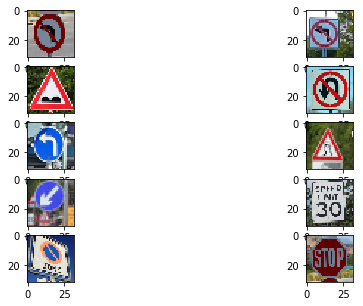

In [77]:
import matplotlib.image as mpimg
import glob
import os

IMG_HEIGHT = 32
IMG_WIDTH = 32

def get_list_files(my_dir,f_ext):
    list_f = []
    for file in os.listdir(my_dir):
        if file.endswith('.'+f_ext):
            list_f.append(file)
    return list_f

my_dir = 'extra'

file_list = get_list_files(my_dir,'png')

X_extra = np.zeros((len(file_list),IMG_HEIGHT,IMG_WIDTH,3),dtype='uint8')
fig,axs = plt.subplots(5,2,figsize=(10,5))
fig.subplots_adjust(hspace=.2,wspace=.001)
axs = axs.ravel()
for idx,file in enumerate(file_list):
    img = cv2.imread(my_dir+'/'+file)
    img = cv2.resize(img,(32,32))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    axs[idx].imshow(img)
    X_extra[idx] = img
my_images = X_extra
my_images_gry = np.sum(my_images/3,axis=3,keepdims=True)
my_images_normalized = (my_images_gry-128)/128
print(my_images_normalized.shape)

In [78]:
# read signnames
with open('data/signnames.csv','r') as sign_name:
    reader = csv.reader(sign_name)
    sign_names = list(reader)

sign_names = sign_names[1::]